In [247]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datavisualization-dataset/data.csv


In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [249]:
df = pd.read_csv('/kaggle/input/datavisualization-dataset/data.csv')
df

,ID,Age,Income,MaritalSituation,hasKids,EducationalYears,EducationalDegree,Fruits,MeatProduct,FishProduct,SweetProduct,GoldProduct
0,0,51,"$84,835.00",Alone,No,12,Graduation,104,379,111,189,218
1,1,60,"$57,091.00",Alone,No,12,Graduation,5,64,7,0,37
2,2,63,"$67,267.00",In couple,Yes,12,Graduation,11,59,15,2,30
3,3,54,"$32,474.00",In couple,Yes,12,Graduation,0,1,0,0,0
4,4,32,"$21,474.00",Alone,Yes,12,Graduation,16,24,11,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,45,"$66,476.00",Alone,Yes,21,PhD,18,126,47,48,78
2236,2236,44,"$31,056.00",In couple,Yes,8,2n Cycle,10,13,3,8,16
2237,2237,45,"$46,310.00",Alone,Yes,12,Graduation,2,88,15,5,14
2238,2238,43,"$65,819.00",In couple,No,12,Graduation,38,701,149,165,63


## Handle null values in your datasets, and clean the data.

In [250]:
# Find the missing values from each column
missing_values  = df.isnull().sum()
print("Missing values:\n",missing_values)
print("*************************************")
print("Total missing values before cleaning:", df.isnull().sum().sum())

Missing values:
 ID                    0
Age                   0
 Income              24
MaritalSituation      0
hasKids               0
EducationalYears      0
EducationalDegree     0
Fruits                0
MeatProduct           0
FishProduct           0
SweetProduct          0
GoldProduct           0
dtype: int64
*************************************
Total missing values before cleaning: 24


In [251]:
# Remove any leading or trailing spaces in the column names
df.columns = df.columns.str.strip()

In [252]:
# Convert 'Income' to numeric after removing the '$' and ',' characters
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values in 'Income' with the median of the column
df['Income'] = df['Income'].fillna(df['Income'].median())


In [253]:
print("Missing values before cleaning:\n", df.isnull().sum())
print("*************************************")
print("Total missing values before cleaning:", df.isnull().sum().sum())

Missing values before cleaning:
 ID                   0
Age                  0
Income               0
MaritalSituation     0
hasKids              0
EducationalYears     0
EducationalDegree    0
Fruits               0
MeatProduct          0
FishProduct          0
SweetProduct         0
GoldProduct          0
dtype: int64
*************************************
Total missing values before cleaning: 0


## Check if there are any outliers by visualizing them.

### Outlier is a value located far away from the mean.

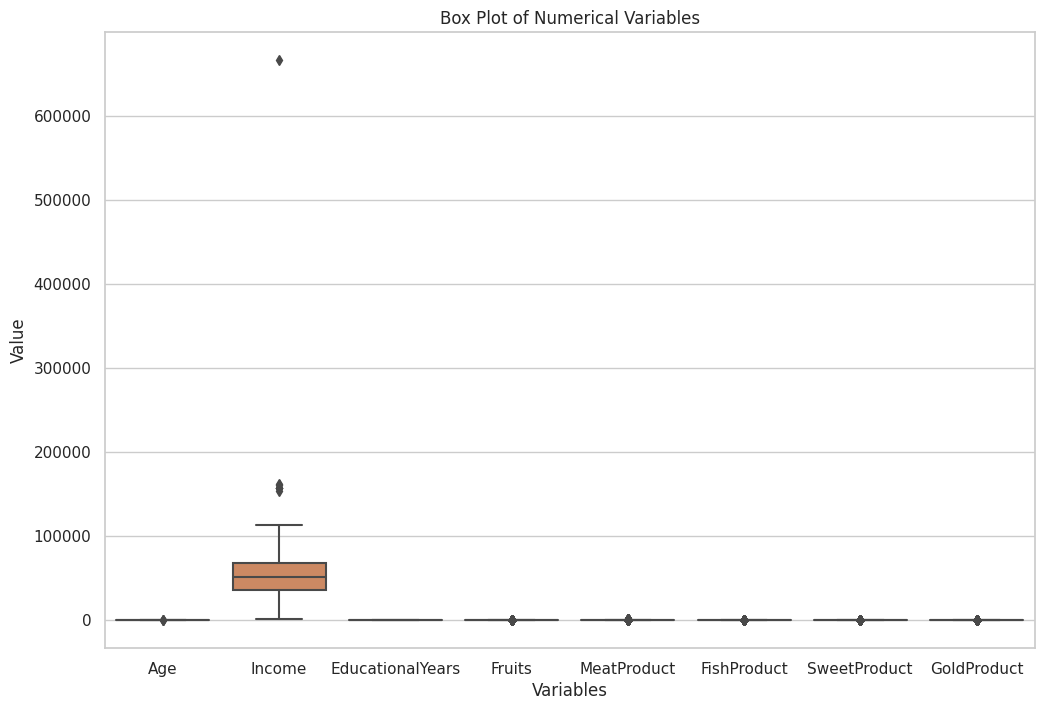

In [254]:
numerical_columns = ['Age', 'Income', 'EducationalYears', 'Fruits', 'MeatProduct', 'FishProduct', 'SweetProduct', 'GoldProduct']

plt.figure(figsize=(12, 8))
sns.boxplot(data= df[numerical_columns])
plt.xlabel('Variables')
plt.ylabel('Value')
plt.title('Box Plot of Numerical Variables')
plt.show()

## Show the correlation coefficients between out variables.
### correlation coefficient describes how one variable moves in relation to another.

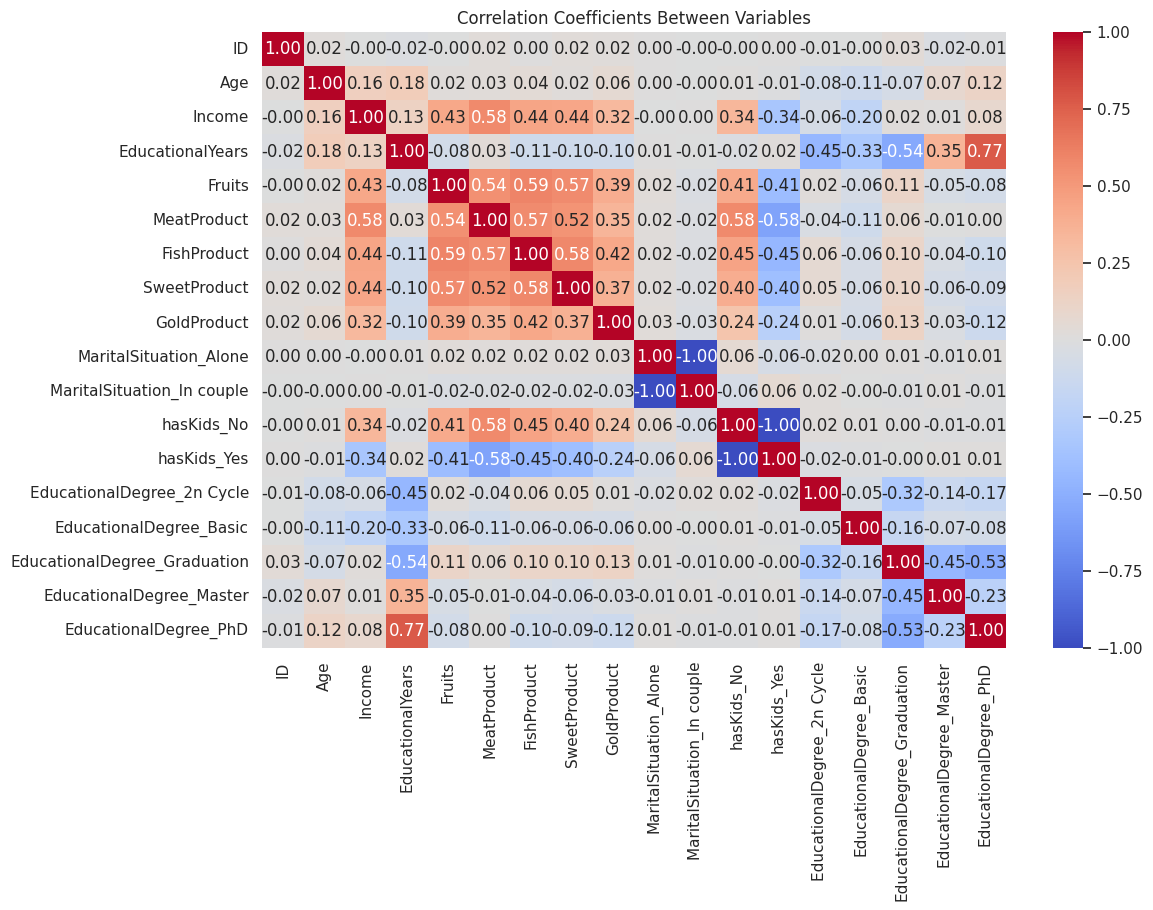

In [255]:
df_encoded = pd.get_dummies(df)
correlation = df_encoded.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Coefficients Between Variables')
plt.show()

## Visualize the relationship between the degree with income level.

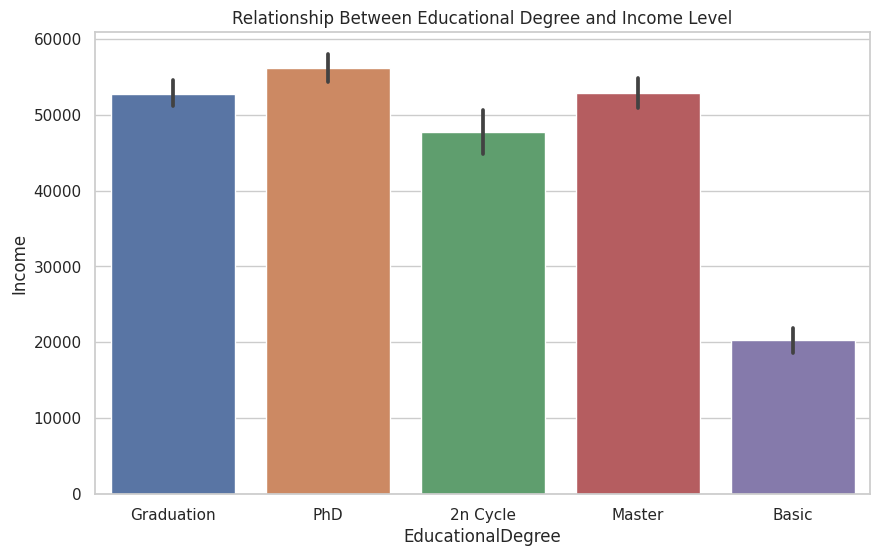

In [256]:
plt.figure(figsize=(10,6))
sns.barplot(x="EducationalDegree", y="Income", data= df)
plt.xlabel("EducationalDegree")
plt.ylabel("Income")
plt.title("Relationship Between Educational Degree and Income Level")
plt.show()

## Visualize is there any relationship between the degree and Marital_Situation
* There's a potential relationship between educational degree and marital situation, as seen from the varying distributions across different educational categories.

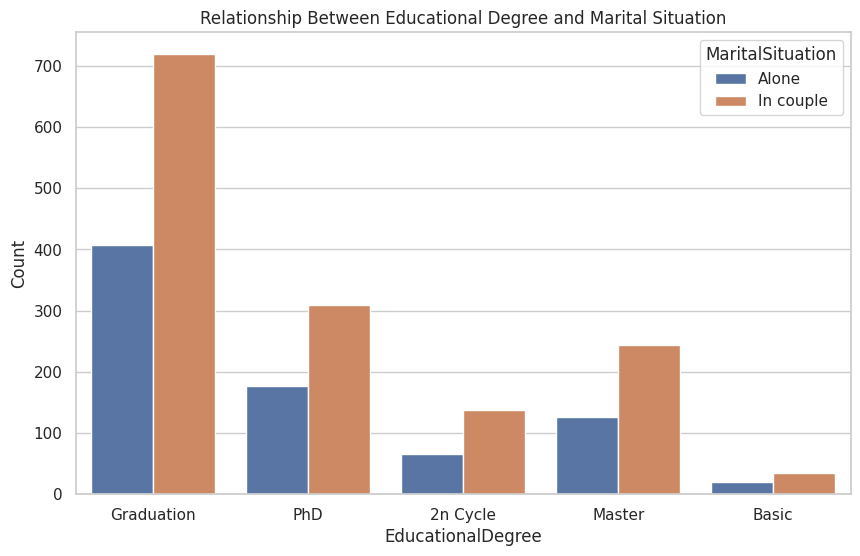

In [257]:
plt.figure(figsize=(10,6))
sns.countplot(x="EducationalDegree", hue="MaritalSituation", data= df)
plt.xlabel("EducationalDegree")
plt.ylabel("Count")
plt.title("Relationship Between Educational Degree and Marital Situation")
plt.show()

## Visualize the relationship between the income level and having child status.

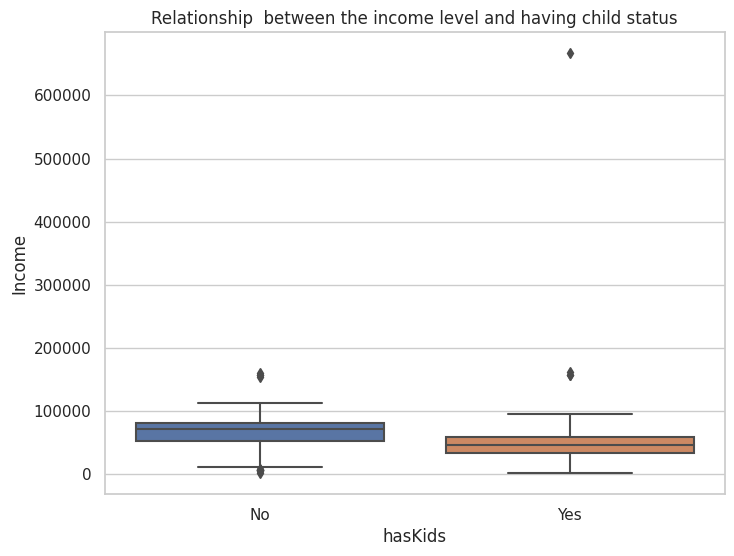

In [258]:
plt.figure(figsize=(8,6))
sns.boxplot(x="hasKids", y="Income", data= df)
plt.xlabel("hasKids")
plt.ylabel("Income")
plt.title("Relationship  between the income level and having child status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [259]:
df

,ID,Age,Income,MaritalSituation,hasKids,EducationalYears,EducationalDegree,Fruits,MeatProduct,FishProduct,SweetProduct,GoldProduct
0,0,51,84835.0,Alone,No,12,Graduation,104,379,111,189,218
1,1,60,57091.0,Alone,No,12,Graduation,5,64,7,0,37
2,2,63,67267.0,In couple,Yes,12,Graduation,11,59,15,2,30
3,3,54,32474.0,In couple,Yes,12,Graduation,0,1,0,0,0
4,4,32,21474.0,Alone,Yes,12,Graduation,16,24,11,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,45,66476.0,Alone,Yes,21,PhD,18,126,47,48,78
2236,2236,44,31056.0,In couple,Yes,8,2n Cycle,10,13,3,8,16
2237,2237,45,46310.0,Alone,Yes,12,Graduation,2,88,15,5,14
2238,2238,43,65819.0,In couple,No,12,Graduation,38,701,149,165,63


## Which product that customers purchase more?. Use a pie chart to present it.

In [260]:
total_purchases = df[['Fruits', 'MeatProduct', 'FishProduct', 'SweetProduct', 'GoldProduct']].sum()
total_purchases

Fruits           58917
MeatProduct     373968
FishProduct      84057
SweetProduct     60621
GoldProduct      98609
dtype: int64

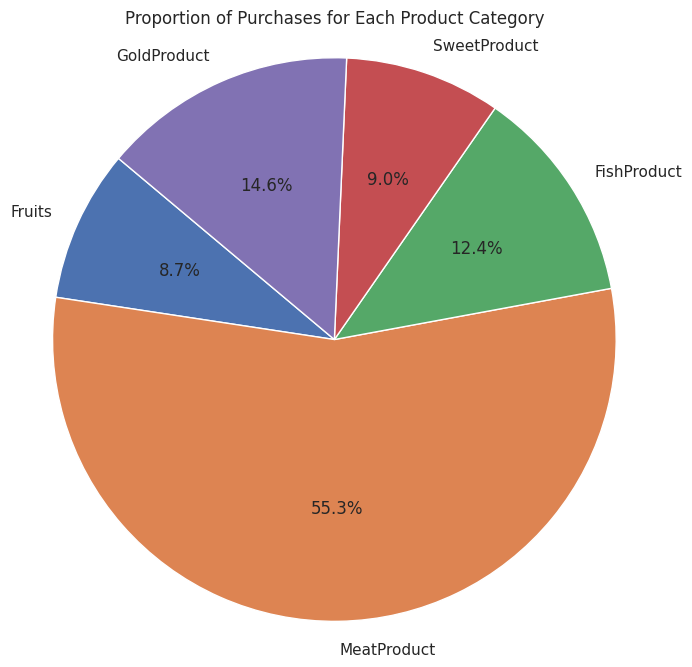

In [261]:
plt.figure(figsize=(8,8))
plt.pie(total_purchases, labels = total_purchases.index, autopct='%1.1f%%', startangle= 140)
plt.title('Proportion of Purchases for Each Product Category')
plt.axis('equal')
plt.show()

## A linear regression

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Age']]  # Independent variable: Age
y = df['Income']  # Dependent variable: Income

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("R-squared Value:", r_squared)


Mean Squared Error (MSE): 1235775433.3992858
R-squared Value: 0.012681977354903284


## Check if are there any patterns or anomalies in the data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


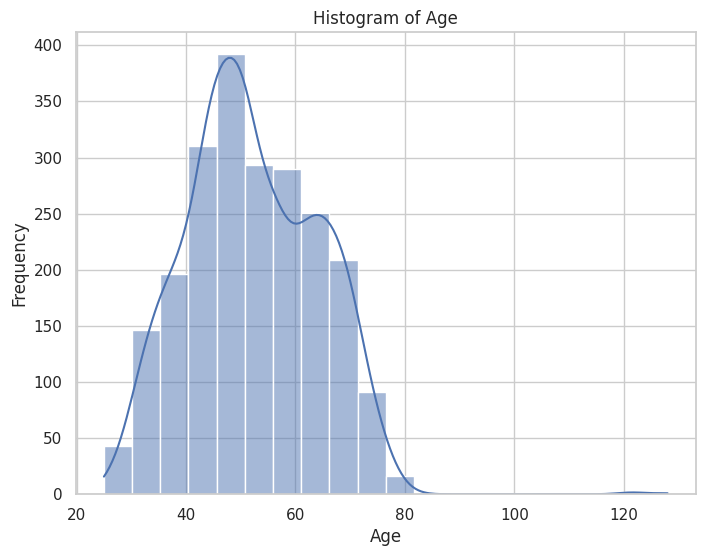

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


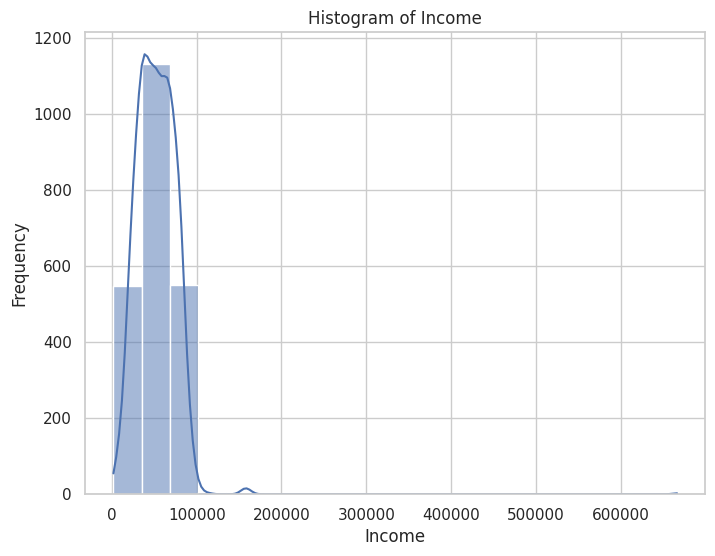

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


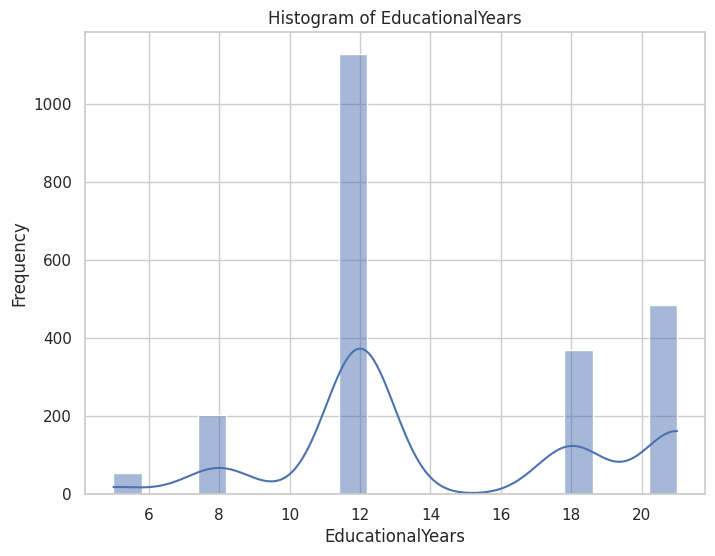

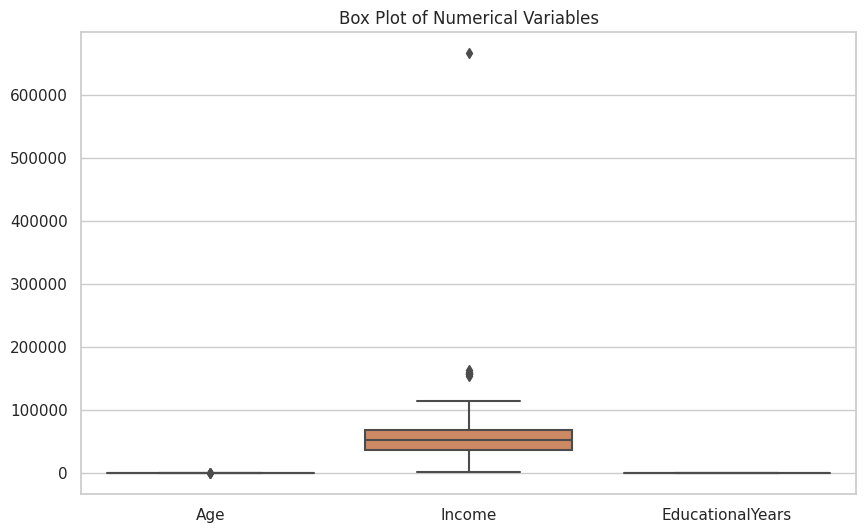

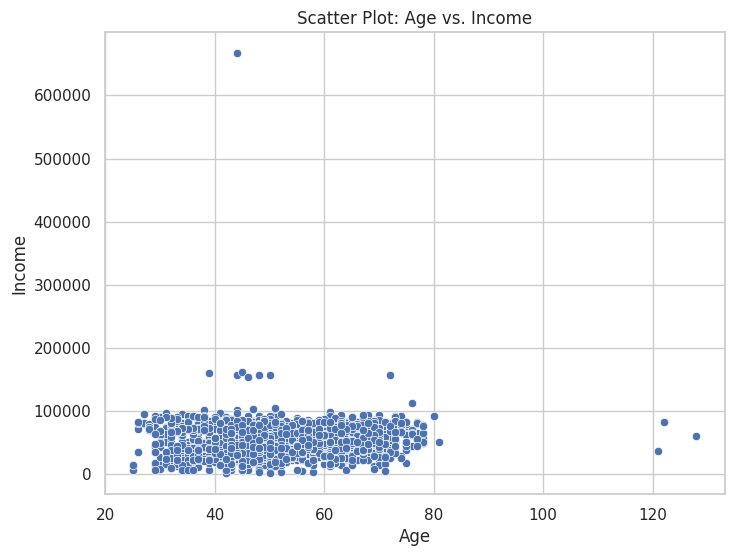

In [263]:
numerical_vars = ['Age', 'Income', 'EducationalYears']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_vars])
plt.title('Box Plot of Numerical Variables')
plt.show()

# Scatter plot to explore relationship between Age and Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Income')
plt.title('Scatter Plot: Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


# Conclusion 

    Through effective data visualization, we gained valuable insights. We observed a potential link between educational attainment and income level, as well as variations in marital status across different educational categories. Additionally, we found differences in income distribution between individuals with and without children. Finally, the pie chart revealed that meat products were the most purchased category among customers. These findings can guide strategic decision-making processes at X company.